### Face completion

You get the left half of a face image. Predict the right one.

In [79]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

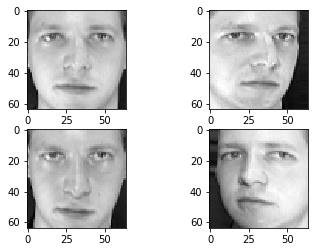

In [43]:
#Yet another matplotlib feature - subplot - creates a grid-like structure of plots
#Syntax: plt.subplot(width,height,index) with index starting from 1.
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

# X,y

We now must slice the data into known part "X" and unknown part "y". Since data is just a numpy array, you can slice it with multi-dimensional slices.

The dimensions are (image_index, height, width).

* `data[:10]` - first 10 images
* `data[:, :10]` - 10-pixel stripe at the top of each image.
* `data[10:20, :, :10]` - take images 10-19 and slice __horizontally__ a stripe of width 10 pixels

Let's now use that to slice our data.


In [44]:
X = data[:, :, :32]


y = data[:, :, 32:]



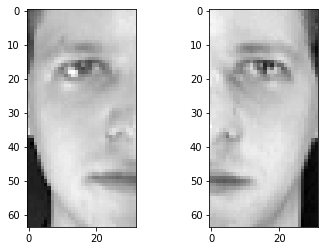

In [45]:
#If you did everything right, you should see two half-faces composing a face
plt.subplot(1,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray')


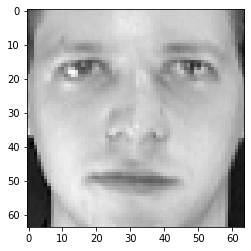

In [48]:
def glue(left_half,right_half):
    #melt two half-faces back into a face
    left_half = left_half.reshape([-1,64,32])
    right_half = right_half.reshape([-1,64,32])
    return np.concatenate([left_half,right_half],axis=-1)


plt.imshow(glue(X,y)[0],cmap='gray')

# Linear Regression

Now let's get through the usual pipeline: split data between train and test; fit linear regression

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X.reshape([len(X),-1]),
                                                 y.reshape([len(y),-1]),
                                                 test_size=0.05,random_state=42)
print("X_train.shape=",X_train.shape)
print("X_test.shape=",X_test.shape)


X_train.shape= (380, 2048)
X_test.shape= (20, 2048)


In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_train,model.predict(X_train)))
print(mean_squared_error(Y_test,model.predict(X_test)))

3.194561e-12
0.0102842115


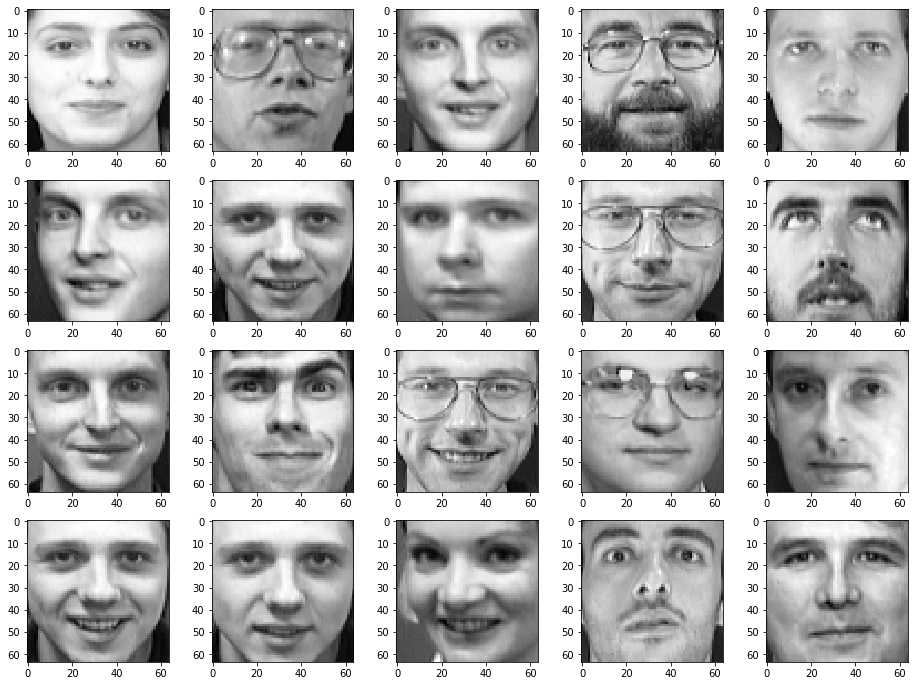

In [52]:
#Images restored on the training settrain

predictions = model.predict(X_train)

pics = glue(X_train,predictions)
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

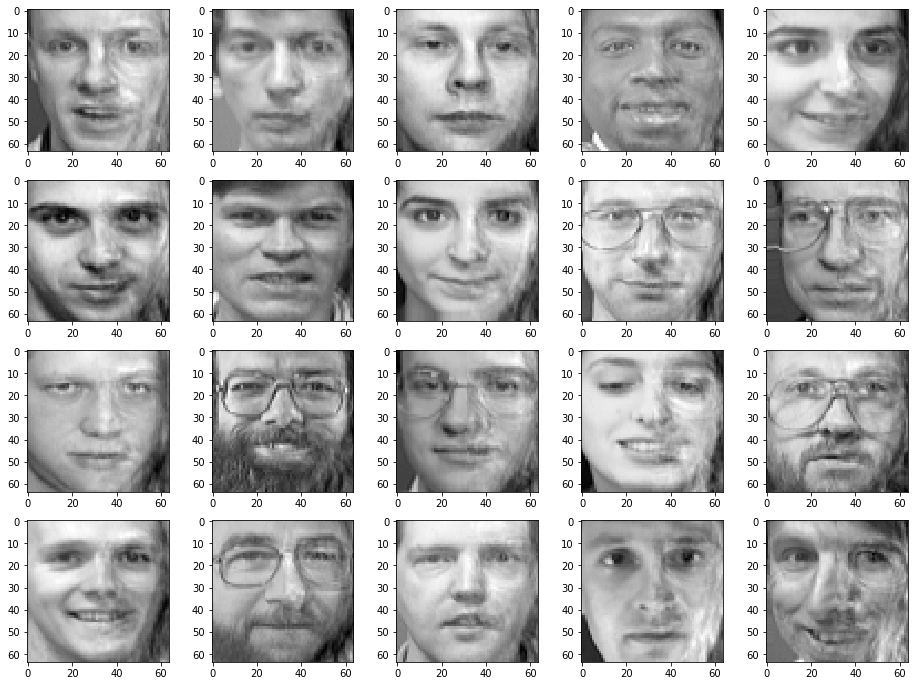

In [53]:
#Images from test restored
predictions = model.predict(X_test)

pics = glue(X_test,predictions)
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

# Ridge regression

Ridge regression is a simple linear regression with L2 penalty: $ argmin \space L + \alpha \cdot \sum_i W_i^2 $


In [54]:
from sklearn.linear_model import Ridge

#Example syntax: Ridge(alpha=0.5), just like LinearRegression


In [55]:
ridgeModel = Ridge(alpha=1)
ridgeModel.fit(X_train,Y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [56]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_train,ridgeModel.predict(X_train)))
print(mean_squared_error(Y_test,ridgeModel.predict(X_test)))

0.0008228936
0.0075132228


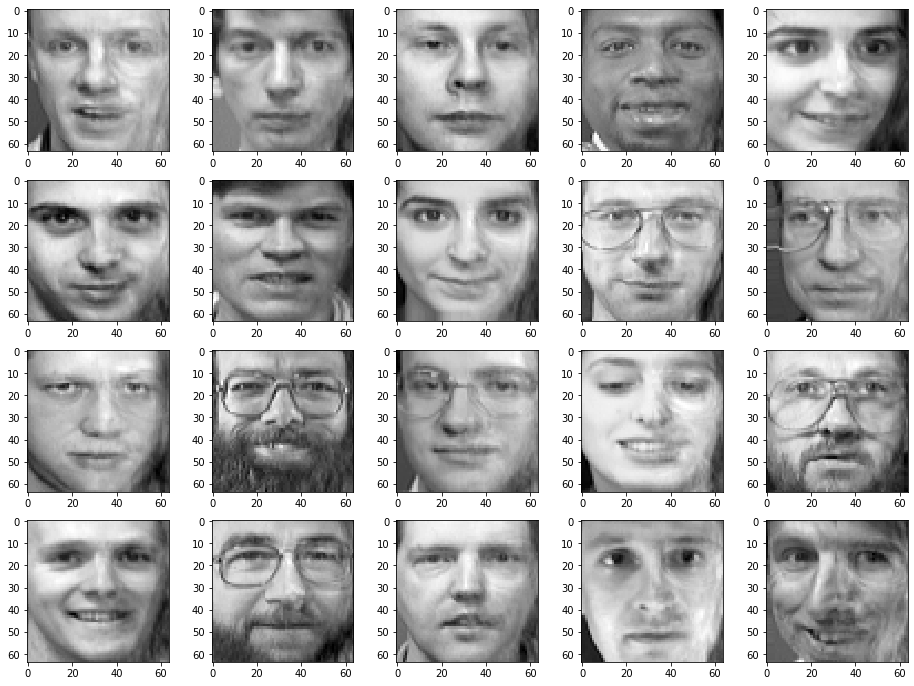

In [57]:
#Images from test restored
predictions = ridgeModel.predict(X_test)

pics = glue(X_test,predictions)
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

# Bonus: Grid search

Find alpha that minimizes test error. You can do so by enumerating all alphas in a reasonable diapason using loops.

In [62]:
def returnError(alpha):
    ridgeModel = Ridge(alpha)
    ridgeModel.fit(X_train,Y_train)
    return(mean_squared_error(Y_test,ridgeModel.predict(X_test)))

print(returnError(2.5))
#alphaErrors = {}

#sort = sorted(alphaErrors.items(), key=lambda item: item[1])

#print(sort[0][0])

0.0071067014


In [84]:
alphaErrors = {} # key = alpha, value = error
sort = ()
smallestError = 1

def returnError(alpha):
    # returns the test error for a given alpha value
    ridgeModel = Ridge(alpha)
    ridgeModel.fit(X_train,Y_train)
    return mean_squared_error(Y_test,ridgeModel.predict(X_test))

def testAlpha(start, end, step):
    # tests a given range of values for alpha
    # saves each value/result pair to the dictionary alphaErrors
    while start <= end:
        alphaErrors[start] = returnError(start)
        start += step

#def sortList():
   # creates a list of tuples, sorted from smallest alpha value and corresponding test error to largest
  #  sort = sorted(alphaErrors.items(), key=lambda item: item[1])))
    
#def main(start,end,step):
#    testAlpha(start,end,step)
 #   sortList()
  #  print(str(alphaErrors))
   # print(str(sort))
    #print(sort[0])

[(1, 0.0075132228), (2, 0.0071671507), (3, 0.0070787203), (4, 0.007076421), (5, 0.0071114227), (6, 0.007164359), (7, 0.007226169), (8, 0.0072921547), (9, 0.0073597464), (10, 0.0074274763)]


In [ ]:
## sort is broken ?

In [83]:
# Find alpha value with lowest error for test data

import numpy as np
from scipy.optimize import fmin
import math

def alpha(x):
    return returnError(x)

alphaValue = float(fmin(alpha,np.array([0])))
print(alphaValue)

/home/ppd/bju38816/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ppd/bju38816/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.58459e-08): result may not be accurate.
  overwrite_a=False)
/home/ppd/bju38816/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.117e-08): result may not be accurate.
  overwrite_a=False)


Optimization terminated successfully.
         Current function value: 0.007071
         Iterations: 28
         Function evaluations: 61
3.5197500000000046


In [ ]:
#Run side-by-side with originals - this is Ridge with improved alpha value

from sklearn.linear_model import Ridge

ridgeModel = Ridge(alpha=alphaValue)
ridgeModel.fit(X_train,Y_train)

predictions = ridgeModel.predict(X_test)

pics = glue(X_test,predictions)
plt.figure(figsize=[16,12])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')


In [ ]:
# Ridge with generic alpha value

ridgeModel = Ridge(alpha=0.5)
ridgeModel.fit(X_train,Y_train)

predictions = ridgeModel.predict(X_test)

pics = glue(X_test,predictions)
plt.figure(figsize=[16,12])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

In [111]:
alphaErrors.clear()
lists.clear()
testAlpha(0, 40, 0.25)

/home/ppd/bju38816/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


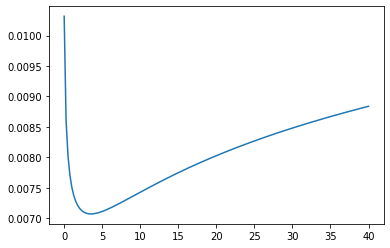

In [112]:
lists = sorted(alphaErrors.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()